# Kickstarter project (A/B testing)

It is incredible to see how kickstarter has allowed so many people to to complete their dream project. Kickstarter is a crowdfunding platform that has helped projects raise over 3.5 billion dollars since 2009. However, despite the many people who have created successful kickstarter campaigns, the majority of campaigns are considered failures. A campaign is considered a failure if it does not meet 100% of its goal. In fact, many campaigns don't even meet 10% of their goal. See the visualizations below.

In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [142]:
campaigns = pd.read_csv('ks-projects-201801.csv')
campaigns['% funded'] = campaigns['usd_pledged_real']/campaigns['usd_goal_real']

In [143]:
campaigns.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,% funded
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0.000000
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0.080700
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0.004889
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0.000200
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0.065795


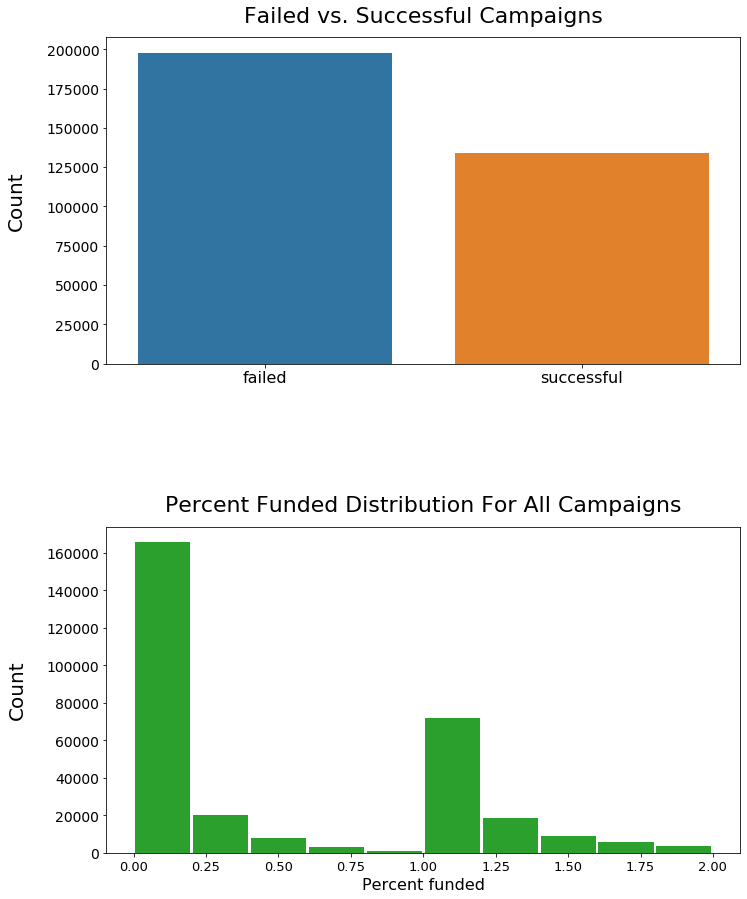

In [190]:
success_and_failures = campaigns[(campaigns['state'] == 'successful')|(campaigns['state'] == 'failed')]

plt.figure(figsize=(25,15))
plt.subplots_adjust(hspace=.5)

plt.subplot(2,2,1)
sns.countplot(success_and_failures['state'])
plt.xlabel("")
plt.xticks(fontsize=16)
plt.ylabel('Count', fontsize=20, labelpad=20)
plt.yticks(fontsize=14)
plt.title('Failed vs. Successful Campaigns', fontsize=22, pad=15)

plt.subplot(2,2,3)
plt.hist(success_and_failures[success_and_failures['% funded'] < 2]['% funded'], color='C2', bins=10, rwidth=.95)
plt.xlabel("Percent funded", fontsize=16)
plt.xticks(fontsize=13)
plt.ylabel('Count', fontsize=20, labelpad=20)
plt.yticks(fontsize=14)
plt.title('Percent Funded Distribution For All Campaigns', fontsize=22, pad=15)

plt.show()

## Plot Summaries

1. There are significantly more failed campaigns than successful campaigns.
    - Total FAILED campaign count is 197719.
    - Total SUCCESSFUL campaign count is 133956.

2. Most campaigns did not meet their goal.
    - 52% of campaigns met 25% of their goal or less
    - 60% of campaigns met less than 100% of their goal.
    - 40% of campaigns met or exceeded their goal.

## Why are so many campaigns failing?

It is clear by both visulations that not only are there many failed campaigns, but many of the failed campaigns do not even meet 25% of their goal. So how can we decrease the number of failed campaigns? How can we increase the average percentage funded? A person can have the best idea for a project, and put together the most compelling kickstarteer campaign. However, the best projects will certainly not receive funding if the best campaign practices are not implemented. One important decision that must be made is campaign category. I believe campaign category can postively or negative impact the success of a campaign. Let's look at the correlation between the campaign categories and success.

In [257]:
count_table = pd.crosstab(success_and_failures[success_and_failures['category'].isin(['Audio', 'Radio & Podcasts'])]['category'], success_and_failures["state"])
count_table

state,failed,successful
category,,
Audio,252,111
Radio & Podcasts,453,394


In [265]:
audio_success = success_and_failures[(success_and_failures['category'] == 'Audio') & (success_and_failures['state'] == 'successful')]
audio_total = success_and_failures[success_and_failures['category'] == 'Audio']
radio_podcasts_success = success_and_failures[(success_and_failures['category'] == 'Radio & Podcasts') & (success_and_failures['state'] == 'successful')]
radio_podcasts_total = success_and_failures[success_and_failures['category'] == 'Radio & Podcasts']
print('The category AUDIO has a {}% success rate'.format(round(100*len(audio_success)/len(audio_total))))
print('The category RADIO & PODCASTS has a {}% success rate'.format(round(100*len(radio_podcasts_success)/len(radio_podcasts_total))))

The category AUDIO has a 31% success rate
The category RADIO & PODCASTS has a 47% success rate


In [259]:
stats.chisquare(count_table, axis=None)

Power_divergenceResult(statistic=232.21487603305783, pvalue=4.591173820329813e-50)

# Hypothesis

According to the Chi Square test there is a significant difference in success between the categories AUDIO and RADIO & PODCASTS. But why is there a such a difference in success when the categories are so similar? I believe it is because Audio is a sub-category of journalism. Traditional journalism is becoming less and less popular, while RADIO & PODCASTING is becoming more and more popular.

# A potential solution

I believe a potential solution would be removing the AUDIO category from Journalism, and directing these campaigns to RADIO & PODCASTING.

# Method for testing

We can ask AUDIO campaign creators for permission to recategorize. We can then separate the AUDIO campaigns into two groups. Group 1 will be 'Not recategorized' AUDIO campaigns. Group 2 will be 'recategorized' AUDIO campaigns into RADIO & PODCASTS. A seperate "recategorized" variable will be created in order to track the two groups. We can then compare the success rate of the two groups for 30 days. <br>
<br>
Key Metric - camapaign state (successful or failed)<br>
Other important metrics - campaign goal, campaign percentage funded, campaign backers

Other than campaign category, the two two groups must be similar. They must share similar goal size, similar country location, etc, etc....

# Measure of success after A/B test is performed

We will measure the success rate of the two groups using a chi-squared test.

#### Outcome 1 - p-value above .05
Conclusion - there is no signifcant difference in success between the two groups. Therefore, I would leave it up to the discretion of the campaign creator whether or not they want to rectegorize.

#### Outcome 2 - p-value below .05 and success rate of group 1 is greater than group 2
conclusion - there is a significant difference in success, however recategorizing seems to negatively affect success. I would recommend not allowing recategorizing in this scenario.

#### Outcome 3 - p-value below .05 and success rate of group 2 is greater than group 1
conclusion - there is a significant difference in success, and it is from recategorizing. I would recommend all AUDIO campaigns be recategorized into RADIO & PODCASTS in this scenario.